<a href="https://colab.research.google.com/github/gsingla21/Machine_Learning/blob/main/Logistic%20Regression/ML_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gourish Singla**

**101803698**

**CoE-15**

#Q1

Import dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris=datasets.load_iris()

In [ ]:
X=pd.DataFrame(iris.data, columns = iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=pd.DataFrame(iris.target)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


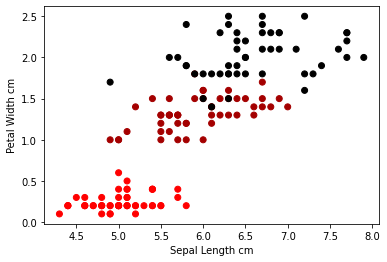

In [ ]:
import matplotlib.pyplot as plt
x = X.values
y = y.values
plt.scatter(x[:,0], x[:, 3], c=y, cmap ='flag')
plt.xlabel('Sepal Length cm')
plt.ylabel('Petal Width cm')
plt.show()

Preprocessing

In [ ]:
y=np.array(y)
y=y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

Logistic Regression procedure

In [ ]:
def hypothesis(theta, X):
  #print("theta.shape: ",theta.shape,"X.shape: ",X.shape)
  z=np.dot(X,theta)
  #print("z.shape: ",z.shape)
  h=1/(1+np.exp(-z))
  return h
def cost(X, y, theta):
  y1 = hypothesis(theta,X)
  J=-(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))
  return J
def gradient_descent(X,y,alpha,iterations):
  theta=[]
  for i in range(X.shape[1]):
    theta.append([0])
  theta=np.array(theta)  
  #print(theta.shape)
  #print("theta: ",theta)
  for i in range(iterations):
    y1 = hypothesis(theta,X)
    #print("y1.shape: ",y1.shape)
    partial_derivative=(1/len(X))*(np.dot(X.T,(y1-y)))
    #print("partial_derivative.shape: ",partial_derivative.shape)
    #print("theta.shape: ",theta.shape)
    theta=theta-(alpha*partial_derivative)
  return theta
def fit(X,y,alpha,iterations):
  print("Fitting the given dataset..")
  theta__=[]
  #cost__=[]
  X=np.insert(X, 0, 1, axis=1)
  m=len(y)
  for i in np.unique(y):
    print('Descending the gradient for label type ' + str(i) + ' vs Rest')
    y_onevsall=np.where(y == i, 1, 0)
    theta=[]
    theta=gradient_descent(X,y_onevsall,alpha,iterations)
    #cost__.append((cost(X,y_onevsall,theta),i)) 
    theta__.append((theta))
  return theta__

Split the dataset.

Fit the dataset in logistic regression procedure. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
theta__=fit(X_train,Y_train,0.1,30000)

Fitting the given dataset..
Descending the gradient for label type 0 vs Rest
Descending the gradient for label type 1 vs Rest
Descending the gradient for label type 2 vs Rest


We got the theta for each i vs Rest.

In [ ]:
print(len(theta__))
theta__

3


[array([[-2.46688149],
        [-2.46688149],
        [-1.99984895],
        [ 2.81079799],
        [-4.2876011 ],
        [-3.82027555]]), array([[-0.54946772],
        [-0.54946772],
        [-0.1256841 ],
        [-1.48460785],
        [ 1.820633  ],
        [-1.78903856]]), array([[-5.89569342],
        [-5.89569342],
        [-1.13383637],
        [-2.16203172],
        [ 9.26664591],
        [ 8.51816915]])]

Preprocess the X_test.

In [ ]:
X_test1 = np.insert(X_test, 0, values=1, axis=1)

Predict the y for 0 vs Rest.

In [ ]:
y_predict=X_test1.dot(theta__[0])
print(y_predict.shape)

(45, 1)


In [ ]:
Y_predict0=hypothesis(theta__[0],X_test1)
Y_label0=np.zeros(len(Y_predict0))
for i in range(len(Y_predict0)):
  if(Y_predict0[i]>=0.5):
    Y_label0[i]=1

In [ ]:
np.unique(Y_label0)

array([0., 1.])

In [ ]:
Y_test1=[]
for i in range(len(Y_test)):
  Y_test1.append(Y_test[i][0])
Y_test1=np.array(Y_test1)
Y_test1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
TP=0
TN=0
FP=0
FN=0
Y_test1=np.array(Y_test1).reshape(-1,1)
for i in range(len(Y_label0)):
  if ((Y_test1[i]==1 or Y_test1[i]==2) and Y_label0[i]==1):
    TP=TP+1
  if ((Y_test1[i]==1 or Y_test1[i]==2) and Y_label0[i]==0):
    FN=FN+1
  if (Y_test1[i]==0 and Y_label0[i]==1):
    FP=FP+1
  if (Y_test1[i]==0 and Y_label0[i]==0):
    TN=TN+1
print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy: ",accuracy)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print(precision_pos,recall_pos,f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print(precision_neg,recall_neg,f1_score_neg)

TP:  0 TN:  0 FP:  19 FN:  26
accuracy:  0.0


ZeroDivisionError: ignored

Predict the y for 1 vs Rest.

In [ ]:
Y_predict1=hypothesis(theta__[1],X_test1)
Y_label1=np.zeros(len(Y_predict1))
for i in range(len(Y_predict1)):
  if(Y_predict1[i]>=0.5):
    Y_label1[i]=1

In [ ]:
Y_label1

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
TP=0
TN=0
FP=0
FN=0
Y_test1=np.array(Y_test1).reshape(-1,1)
for i in range(len(Y_label1)):
  if(Y_test1[i]==2 and Y_label1[i]==1):
    TP=TP+1
  if(Y_test1[i]==2 and Y_label1[i]==0):
    FN=FN+1
  if((Y_test1[i]==0 or Y_test1[i]==1) and Y_label1[i]==1):
    FP=FP+1
  if((Y_test1[i]==0 or Y_test1[i]==1) and Y_label1[i]==0):
    TN=TN+1
print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy: ",accuracy)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\npresision_pos: ",precision_pos,"\nrecall_pos: ",recall_pos,"\nf1_score_pos: ", f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nprecision_neg: ", precision_neg,"\nrecall_neg: ",recall_neg,"\nf1_score_neg: ",f1_score_neg)

TP:  3 TN:  26 FP:  6 FN:  10
accuracy:  0.6444444444444445

presision_pos:  0.3333333333333333 
recall_pos:  0.23076923076923078 
f1_score_pos:  0.27272727272727276

precision_neg:  0.7222222222222222 
recall_neg:  0.8125 
f1_score_neg:  0.7647058823529411


Predict the y for 2 vs Rest.

In [ ]:
Y_predict2=hypothesis(theta__[2],X_test1)
Y_label2=np.zeros(len(Y_predict2))
for i in range(len(Y_predict2)):
  if(Y_predict2[i]>=0.5):
    Y_label2[i]=1

In [ ]:
Y_label2

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
TP=0
TN=0
FP=0
FN=0
Y_test1=np.array(Y_test1).reshape(-1,1)
for i in range(len(Y_label2)):
  if (Y_test1[i]==2 and Y_label2[i]==1):
    TP=TP+1
  if (Y_test1[i]==2 and Y_label2[i]==0):
    FN=FN+1
  if ((Y_test1[i]==0 or Y_test1[i]==1) and Y_label2[i]==1):
    FP=FP+1
  if ((Y_test1[i]==0 or Y_test[i]==1) and Y_label2[i]==0):
    TN=TN+1
print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy: ",accuracy)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\npresision_pos: ",precision_pos,"\nrecall_pos: ",recall_pos,"\nf1_score_pos: ", f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nprecision_neg: ", precision_neg,"\nrecall_neg: ",recall_neg,"\nf1_score_neg: ",f1_score_neg)

TP:  13 TN:  32 FP:  0 FN:  0
accuracy:  1.0

presision_pos:  1.0 
recall_pos:  1.0 
f1_score_pos:  1.0

precision_neg:  1.0 
recall_neg:  1.0 
f1_score_neg:  1.0


In [ ]:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print("macro_precision: ",macro_precision,"\nmacro_recall: ",macro_recall,"\nmacro_f1_score: ",macro_f1_score)

macro_precision:  1.0 
macro_recall:  1.0 
macro_f1_score:  1.0


In [ ]:
#Weighted Average:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print("weighted_precision: ",weighted_precision,"\nweighted_recall: ",weighted_recall,"\nweighted_f1_score: ",weighted_f1_score)

weighted_precision:  1.0 
weighted_recall:  1.0 
weighted_f1_score:  1.0


Logistic regression with In-built fuction.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression(multi_class="multinomial", solver="sag")
#sag denote Stochastic Average Gradient
model=lr.fit(X_train,Y_train)
Y_label_inbuilt=model.predict(X_test)
print(metrics.classification_report(Y_test,Y_label_inbuilt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
metrics.accuracy_score(Y_test, Y_label_inbuilt)*100

100.0

In [ ]:
Y_label_inbuilt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

#Q2

In [ ]:
import pandas as pd
url="/content/drive/MyDrive/ML assignments/Assignment 6/Dataset/exam.txt"
dataset=pd.read_csv(url, sep=",",header=None)
print(dataset)

            0         1  2
0    0.051267  0.699560  1
1   -0.092742  0.684940  1
2   -0.213710  0.692250  1
3   -0.375000  0.502190  1
4   -0.513250  0.465640  1
..        ...       ... ..
113 -0.720620  0.538740  0
114 -0.593890  0.494880  0
115 -0.484450  0.999270  0
116 -0.006336  0.999270  0
117  0.632650 -0.030612  0

[118 rows x 3 columns]


In [ ]:
dataset.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


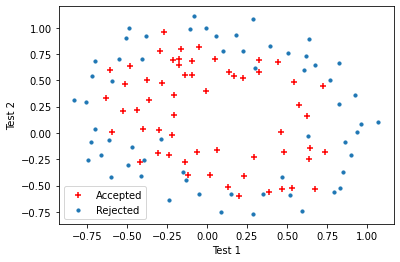

In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

Normal logistic regression can only to able to fit a linear decision boundary which will not do well in this case. It is decided in the assignment that we will add polynomial terms up to the 6th power.

In [ ]:
degree=6

X_new = np.ones(len(X[:,0])).reshape(len(X[:,0]),1)
for i in range(1,degree+1):
  for j in range(i+1):
    terms= (X[:,0]**(i-j) * X[:,1]**j).reshape(len(X[:,0]),1)
    X_new= np.hstack((X_new,terms))
X_new

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

Preprocessing

In [ ]:
X_new.shape

(118, 28)

In [ ]:
y=np.array(y)
y=y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_new)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Step-by-Step Logistic Regression (with no regularization; alpha=10; number of iterations=1000)

In [ ]:
n=1000 #number of iterations
alpha=10
m,k=X_train.shape 
beta=np.zeros(k)
for i in range(n): 
  cost_gradient=np.zeros(k) 
  z=X_train.dot(beta) 
  predicted=1/(1+np.exp(-z)) 
  difference=predicted-Y_train
  for j in range(k): 
    cost_gradient[j]=np.sum(difference.dot(X_train[:,j]))
  for j in range(k): 
    beta[j]=beta[j]-(alpha/m)*cost_gradient[j] 
print(beta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


[-374.48802612    0.           45.02095192  367.65149592  204.66762246
   36.19129792  100.25167932  100.74139611  112.44807816   15.64159475
  134.25115559   50.25739483 -153.25950727  -25.36341299   18.89155427
   43.77702574   38.60827299   38.83075006    4.12620632   -0.94784279
   55.81110426    4.21399033   86.68701015  170.10843469   87.25135406
  149.67486513   85.35833508   20.60944115  -29.69501204]


In [ ]:
Y_predict=1/(1+np.exp(-(X_test.dot(beta))))
Y_label=np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
  if(Y_predict[i]>=0.5):
    Y_label[i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(Y_label)):
  if (Y_test[i]==1 and Y_label[i]==1):
    TP=TP+1
  if (Y_test[i]==1 and Y_label[i]==0):
    FN=FN+1
  if (Y_test[i]==0 and Y_label[i]==1):
    FP=FP+1
  if (Y_test[i]==0 and Y_label[i]==0):
    TN=TN+1
print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy: ",accuracy)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\nprecision_pos: ",precision_pos,"\nrecall_pos: ",recall_pos,"\nf1_score_pos: ",f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nprecision_neg: ",precision_neg,"\nrecall_neg: ",recall_neg,"\nf1_score_neg: ",f1_score_neg)

TP:  1 TN:  7 FP:  9 FN:  19
accuracy:  0.2222222222222222

precision_pos:  0.1 
recall_pos:  0.05 
f1_score_pos:  0.06666666666666667

precision_neg:  0.2692307692307692 
recall_neg:  0.4375 
f1_score_neg:  0.33333333333333337


In [ ]:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print("macro_precision: ",macro_precision,"\nmacro_recall: ",macro_recall,"\nmacro_f1_score: ",macro_f1_score)

macro_precision:  0.18461538461538463 
macro_recall:  0.24375 
macro_f1_score:  0.2


In [ ]:
#Weighted Average:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print("weighted_precision: ",weighted_precision,"\nweighted_recall: ",weighted_recall,"\nweighted_f1_score: ",weighted_f1_score)

weighted_precision:  0.1752136752136752 
weighted_recall:  0.2222222222222222 
weighted_f1_score:  0.1851851851851852


Step-by-Step Logistic Regression (with ridge regularization; alpha=10; number of iterations=1000; lambda=0.2)

In [ ]:
n=1000 #number of iterations
alpha=10
Lambda=0.2
m,k=X_train.shape 
beta1=np.zeros(k)
for i in range(n): 
  cost_gradient=np.zeros(k) 
  z=X_train.dot(beta) 
  predicted=1/(1+np.exp(-z)) 
  difference=predicted-Y_train
  cost_gradient[0]=np.sum(difference.dot(X_train[:,0]))
  for j in range(1,k): 
    cost_gradient[j]=np.sum(difference.dot(X_train[:,j])) + (Lambda/m)* beta[j]
  for j in range(k): 
    beta1[j]=beta[j]-(alpha/m)*cost_gradient[j] 
print(beta1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


[-1.95770653e+02  0.00000000e+00 -1.26370373e+02  1.83563841e+02
  7.26757257e+01 -1.36455783e+02 -3.52568425e+01 -7.45522149e+01
 -8.21793207e+01 -9.48725963e+01 -5.01975546e+01 -9.04592953e+01
 -3.29260694e+02 -1.92012829e+02 -9.66762230e+01 -9.74433249e+01
 -1.27260873e+02 -1.34717697e+02 -1.20361851e+02 -2.07358553e+02
 -2.65030749e-01 -1.51590347e+02 -5.32519102e+01  1.13703130e+00
 -5.75917811e+01  1.31099239e+01 -8.71530252e+01 -3.54651478e+01
 -1.55377419e+02]


In [ ]:
Y_predict1=1/(1+np.exp(-(X_test.dot(beta1))))
Y_label1=np.zeros(len(Y_predict1))
for i in range(len(Y_predict1)):
  if(Y_predict1[i]>=0.5):
    Y_label1[i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [ ]:
TP=0
TN=0
FP=0
FN=0

for i in range(len(Y_label1)):
  if (Y_test[i]==1 and Y_label1[i]==1):
    TP=TP+1
  if (Y_test[i]==1 and Y_label1[i]==0):
    FN=FN+1
  if (Y_test[i]==0 and Y_label1[i]==1):
    FP=FP+1
  if (Y_test[i]==0 and Y_label1[i]==0):
    TN=TN+1
print("TP: ",TP,"TN: ",TN,"FP: ",FP,"FN: ",FN)
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy: ",accuracy)
#For positive class:
precision_pos=TP/(TP+FP)
recall_pos=TP/(TP+FN)
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("\nprecision_pos: ",precision_pos,"\nrecall_pos: ",recall_pos,"\nf1_score_pos: ",f1_score_pos)
#For negative class
precision_neg=TN/(TN+FN)
recall_neg=TN/(TN+FP)
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("\nprecision_neg: ",precision_neg,"\nrecall_neg: ",recall_neg,"\nf1_score_neg: ",f1_score_neg)

TP:  16 TN:  9 FP:  7 FN:  4
accuracy:  0.6944444444444444

precision_pos:  0.6956521739130435 
recall_pos:  0.8 
f1_score_pos:  0.7441860465116279

precision_neg:  0.6923076923076923 
recall_neg:  0.5625 
f1_score_neg:  0.6206896551724138


In [ ]:
macro_precision=(precision_pos+precision_neg)/2
macro_recall=(recall_pos+recall_neg)/2
macro_f1_score=(f1_score_pos+f1_score_neg)/2
print("macro_precision: ",macro_precision,"\nmacro_recall: ",macro_recall,"\nmacro_f1_score: ",macro_f1_score)

macro_precision:  0.6939799331103679 
macro_recall:  0.68125 
macro_f1_score:  0.6824378508420208


In [ ]:
#Weighted Average:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print("weighted_precision: ",weighted_precision,"\nweighted_recall: ",weighted_recall,"\nweighted_f1_score: ",weighted_f1_score)

weighted_precision:  0.6941657376439986 
weighted_recall:  0.6944444444444444 
weighted_f1_score:  0.6892987614719772
